In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
pd.pandas.set_option('display.max_columns',None)

In [3]:
dataset=pd.read_csv('test.csv')

In [4]:
dataset.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [5]:
dataset.shape

(1459, 80)

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [7]:
columns_to_drop=['BsmtFinSF1','GrLivArea','GarageYrBlt','GarageArea'
                 ,'WoodDeckSF','MasVnrArea','2ndFlrSF','OpenPorchSF','EnclosedPorch','ScreenPorch']
dataset.drop(columns=columns_to_drop,axis=1,inplace=True)

In [8]:
dataset.shape

(1459, 70)

In [9]:
# Here we will check all % of missing value are there is each feature
#  First step is to make the list of feature having nan value
feature_with_nan=  [features for features in dataset.columns if dataset[features].isnull().sum()>1]

#  Second step is to print feature name and corresponding % of nan value
for features in feature_with_nan:
    print(features,np.round(dataset[features].isnull().mean(),4) ,'% of missing values')

MSZoning 0.0027 % of missing values
LotFrontage 0.1556 % of missing values
Alley 0.9267 % of missing values
Utilities 0.0014 % of missing values
MasVnrType 0.011 % of missing values
BsmtQual 0.0302 % of missing values
BsmtCond 0.0308 % of missing values
BsmtExposure 0.0302 % of missing values
BsmtFinType1 0.0288 % of missing values
BsmtFinType2 0.0288 % of missing values
BsmtFullBath 0.0014 % of missing values
BsmtHalfBath 0.0014 % of missing values
Functional 0.0014 % of missing values
FireplaceQu 0.5003 % of missing values
GarageType 0.0521 % of missing values
GarageFinish 0.0535 % of missing values
GarageQual 0.0535 % of missing values
GarageCond 0.0535 % of missing values
PoolQC 0.9979 % of missing values
Fence 0.8012 % of missing values
MiscFeature 0.965 % of missing values


In [11]:
# Creating  a list having numerical variables 
numerical_var=[feature for feature in dataset.columns if dataset[feature].dtype !='O']

In [12]:
print('Number of Numerical Feature',len(numerical_var))

Number of Numerical Feature 27


In [13]:
#Visualising these numerical feature
dataset[numerical_var].head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,3SsnPorch,PoolArea,MiscVal,MoSold,YrSold
0,1461,20,80.0,11622,5,6,1961,1961,144.0,270.0,882.0,896,0,0.0,0.0,1,0,2,1,5,0,1.0,0,0,0,6,2010
1,1462,20,81.0,14267,6,6,1958,1958,0.0,406.0,1329.0,1329,0,0.0,0.0,1,1,3,1,6,0,1.0,0,0,12500,6,2010
2,1463,60,74.0,13830,5,5,1997,1998,0.0,137.0,928.0,928,0,0.0,0.0,2,1,3,1,6,1,2.0,0,0,0,3,2010
3,1464,60,78.0,9978,6,6,1998,1998,0.0,324.0,926.0,926,0,0.0,0.0,2,1,3,1,7,1,2.0,0,0,0,6,2010
4,1465,120,43.0,5005,8,5,1992,1992,0.0,1017.0,1280.0,1280,0,0.0,0.0,2,0,2,1,5,0,2.0,0,0,0,1,2010


In [15]:
## Numerical variables are usually of 2 type
## 1. Continous variable and Discrete Variables

descrete_var=[feature for feature in numerical_var if len(dataset[feature].unique())<25 and feature not in year_fea+ ['Id']]

In [17]:
## 1. Continous variable and Discrete Variables
print('Size of descrete Feature:{}'.format(len(descrete_var)))

Size of descrete Feature:16


In [19]:
# making the list of continuous feature
continuous_feature=[feature for feature in numerical_var if feature not in descrete_var + year_fea+['Id']]

In [20]:
continuous_feature

['LotFrontage',
 'LotArea',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 'MiscVal']

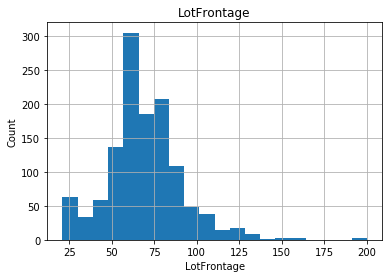

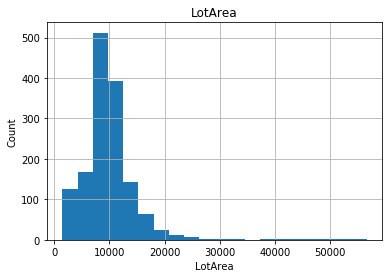

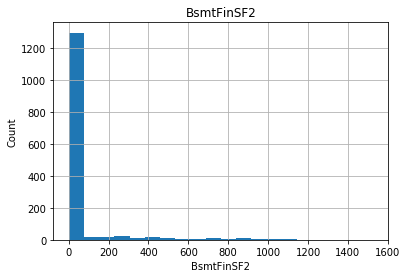

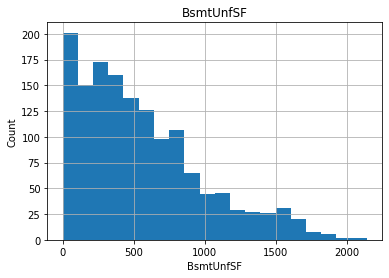

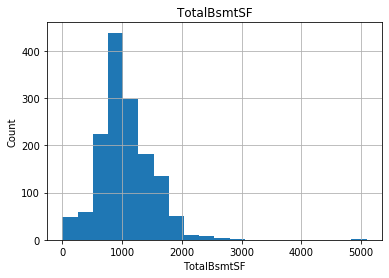

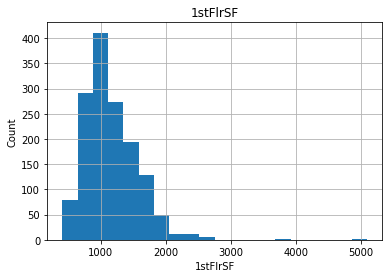

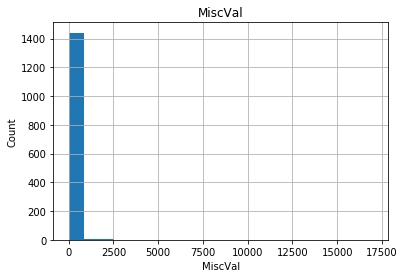

In [21]:
# Lets analyse the continuous feature and draw the histogram

for feature in continuous_feature:
    data=dataset.copy()
    data[feature].hist(bins=20)
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.title(feature)
    plt.show()

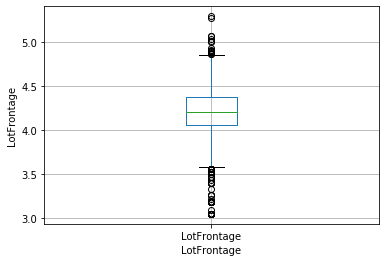

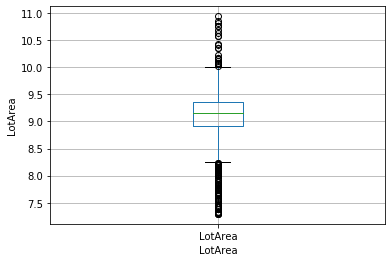

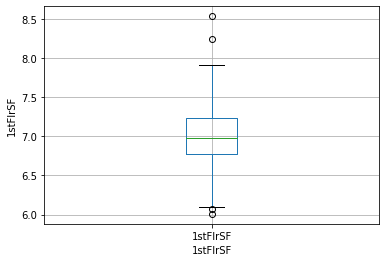

In [22]:
# Using Box Plot for finding outliers

for feature in continuous_feature:
    data=dataset.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]= np.log(data[feature])
        data.boxplot(column=feature)
        plt.xlabel(feature)
        plt.ylabel(feature)
        plt.show()

In [23]:
categorical_feature=[feature for feature in dataset.columns if dataset[feature].dtype=='O']

In [24]:
categorical_feature

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [25]:
# There are many categoracal feature in the dataset 
# lets find the numbers of categories in each categorical_feature
for feature in categorical_feature:
    print("The Feature is {} and the number of categories are {}".format(feature,len(dataset[feature].unique())))

The Feature is MSZoning and the number of categories are 6
The Feature is Street and the number of categories are 2
The Feature is Alley and the number of categories are 3
The Feature is LotShape and the number of categories are 4
The Feature is LandContour and the number of categories are 4
The Feature is Utilities and the number of categories are 2
The Feature is LotConfig and the number of categories are 5
The Feature is LandSlope and the number of categories are 3
The Feature is Neighborhood and the number of categories are 25
The Feature is Condition1 and the number of categories are 9
The Feature is Condition2 and the number of categories are 5
The Feature is BldgType and the number of categories are 5
The Feature is HouseStyle and the number of categories are 7
The Feature is RoofStyle and the number of categories are 6
The Feature is RoofMatl and the number of categories are 4
The Feature is Exterior1st and the number of categories are 14
The Feature is Exterior2nd and the numb

In [26]:
# Lets make a list of categorical features with nan values

categorical_with_nan=[feature for feature in dataset.columns if dataset[feature].isnull().sum()>1 and dataset[feature].dtype=='O']

In [27]:
print("Length of categorical feature with nan values:{}".format(len(categorical_with_nan)))

Length of categorical feature with nan values:18


In [28]:
# Replacing the missing values with new label

def replace_nan_cat(dataset,categorical_with_nan):
    data=dataset.copy()
    data[categorical_with_nan]=data[categorical_with_nan].fillna("missing")
    return data
    
dataset=replace_nan_cat(dataset,categorical_with_nan)

dataset[categorical_with_nan].isnull().sum()

MSZoning        0
Alley           0
Utilities       0
MasVnrType      0
BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
Functional      0
FireplaceQu     0
GarageType      0
GarageFinish    0
GarageQual      0
GarageCond      0
PoolQC          0
Fence           0
MiscFeature     0
dtype: int64

In [29]:
# Now lets explore the numerical_variables with nan values

numerical_with_nan=[feature for feature in dataset.columns if dataset[feature].isnull().sum()>1 and dataset[feature].dtype!='O']

for feature in numerical_with_nan:
    print("{} has {} % of missing value".format(feature,np.round(dataset[feature].isnull().mean(),4)))

LotFrontage has 0.1556 % of missing value
BsmtFullBath has 0.0014 % of missing value
BsmtHalfBath has 0.0014 % of missing value


In [30]:
# Now replacing the numerical missing values 
# since there is outliers in continuous features will replace the missing valuse with median

for feature in numerical_with_nan:
   # data=dataset.copy()
    median_value=dataset[feature].median()
    
    # creating a new feature to capture nan values
    #dataset[feature+'nan']=np.where(dataset[feature].isnull(),1,0)
    dataset[feature].fillna(median_value,inplace=True)
    
dataset[numerical_with_nan].isnull().sum()    

LotFrontage     0
BsmtFullBath    0
BsmtHalfBath    0
dtype: int64

In [31]:
# creating a variable of list type which will contain the year info

year_fea=[feature for feature in numerical_var if 'Yr' in feature or 'Year' in feature]
year_fea

['YearBuilt', 'YearRemodAdd', 'YrSold']

In [32]:
# Handeling the temporal Variable
for feature in ['YearBuilt', 'YearRemodAdd']:
    dataset[feature]=dataset['YrSold']-dataset[feature]


In [33]:
dataset[['YearBuilt', 'YearRemodAdd']].head()

,YearBuilt,YearRemodAdd
0,49,49
1,52,52
2,13,12
3,12,12
4,18,18


In [35]:
# Since the numerical_features are skewed in nature so we need to perform log normal distribution to convert it into gaussian distribution

numerical_feature=['LotFrontage',
 'LotArea']

for feature in numerical_feature:
    dataset[feature]=np.log(dataset[feature])

In [36]:
#removing categorical variables that are present less than 1% of the observations

categorical_feature=[feature for feature in dataset.columns if dataset[feature].dtype=='O']
categorical_feature


['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']